In [50]:
import pandas as pd
import numpy as np

***Cleaning the Train Data***

In [51]:
titanic = pd.read_csv('train.csv') 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic_1=titanic.groupby(["Pclass","SibSp"])
titanic_1_median=titanic_1.median()
titanic_1_median

PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.5500

In [53]:
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()

In [54]:
titanic["Age"]=titanic["Age"].fillna(fill_age(titanic,titanic_1_median))

In [55]:
titanic["Cabin"]=titanic["Cabin"].fillna("U")
titanic["Cabin"]=titanic["Cabin"].map(lambda x: x[0])
def new_cabin_features(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0) 
new_cabin_features(titanic)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [57]:
x = titanic.drop(['Name','Cabin','Embarked','Ticket','Survived'], axis=1)
print(x)

     PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare  Cabin A  \
0              1       3    male  22.0      1      0   7.2500        0   
1              2       1  female  38.0      1      0  71.2833        0   
2              3       3  female  26.0      0      0   7.9250        0   
3              4       1  female  35.0      1      0  53.1000        0   
4              5       3    male  35.0      0      0   8.0500        0   
..           ...     ...     ...   ...    ...    ...      ...      ...   
886          887       2    male  27.0      0      0  13.0000        0   
887          888       1  female  19.0      0      0  30.0000        0   
888          889       3  female  25.0      1      2  23.4500        0   
889          890       1    male  26.0      0      0  30.0000        0   
890          891       3    male  32.0      0      0   7.7500        0   

     Cabin B  Cabin C  Cabin D  Cabin E  Cabin F  Cabin G  Cabin T  
0          0        0        0        0   

In [58]:
y=titanic["Survived"]

In [59]:
map_sex = {
    'female': 1, 
    'male': 0
}

x.Sex = x.Sex.map(map_sex)

***Data Visualization***

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

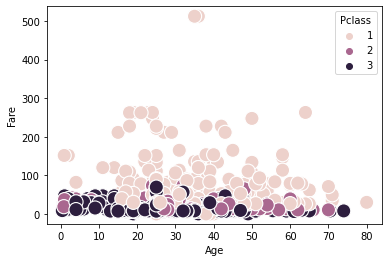

In [61]:
sns.scatterplot(x=x.Age, y=x.Fare, hue=x.Pclass, s=200);

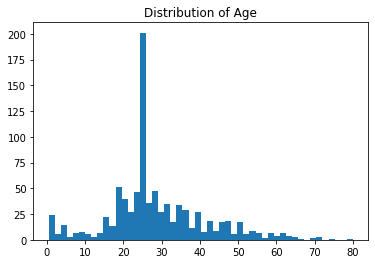

In [13]:
plt.title("Distribution of Age")
plt.hist(x.Age,bins=50);

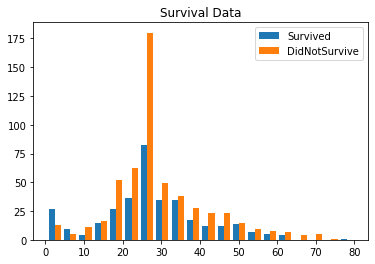

In [62]:
survived_df = titanic[titanic.Survived == 1]
DidNotSurvive_df = titanic[titanic.Survived == 0]
plt.title('Survival Data')

plt.hist([survived_df.Age, DidNotSurvive_df.Age],bins=20);

plt.legend(['Survived', 'DidNotSurvive']);

In [63]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=1)

***GridSearchCV to Tune Hyperparameters***

Linear Kernel

In [18]:
params = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear']
}]
gs_lin = GridSearchCV(svm.SVC(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_lin.fit(x_train, y_train)
gs_lin.best_params_

{'C': 1000, 'kernel': 'linear'}

In [20]:
gs_lin.score(x_train, y_train), gs_lin.score(x_val, y_val)

(0.8019662921348315, 0.7597765363128491)

In [21]:
model = svm.SVC(C=1000, kernel='linear')
model.fit(x_train, y_train)
preds = model.predict(x_val) #testing

print("Accuracy of SVM model is:", metrics.accuracy_score(y_val, preds)*100)

Accuracy of SVM model is: 75.97765363128491


rbf Kernel

In [31]:
params = [{
    'C': [ 0.01, 0.1, 1, 10 ],
    'kernel': ['rbf'],
    'gamma': [ 0.01, 0.1, 1, 10 ]
}]
gs_rbf = GridSearchCV(svm.SVC(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_rbf.fit(x_train, y_train)
gs_rbf.best_params_

{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}

In [73]:
model_rbf = svm.SVC(C=0.01, kernel='rbf', gamma=0.01)
model_rbf.fit(x_train, y_train)
preds = model_rbf.predict(x_val) #testing

print("Accuracy of SVM model is:", metrics.accuracy_score(y_val, preds)*100)

Accuracy of SVM model is: 59.217877094972074


In [33]:
gs_rbf.score(x_train, y_train), gs_rbf.score(x_val, y_val)

(0.6221910112359551, 0.5921787709497207)

***Predictions on test.csv***

In [65]:
df_test = pd.read_csv('test.csv')

In [66]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [67]:
df_test['Fare'].fillna((df_test['Fare'].mean()), inplace=True)

In [68]:
df_test.Sex = df_test.Sex.map(map_sex)

In [69]:
df_test["Cabin"]=df_test["Cabin"].fillna("U")
df_test["Cabin"]=df_test["Cabin"].map(lambda x: x[0])
new_cabin_features(df_test)

In [70]:
df_test["Age"]=df_test["Age"].fillna(fill_age(df_test,titanic_1_median))


In [72]:
df_test.drop(['Name','Cabin','Embarked','Ticket'], axis=1, inplace=True)

In [74]:
y_test_lin = model.predict(df_test)
y_test_rbf = model_rbf.predict(df_test)

In [75]:
Lin_pred = pd.DataFrame({
    'predictions': y_test_lin
})
Lin_pred.to_csv('Lin_ME19B002.csv', index=False)

RBF_pred = pd.DataFrame({
    'predictions': y_test_rbf
})
Lin_pred.to_csv('RBF_ME19B002.csv', index=False)